In [1]:
import os
import cx_Oracle
import pandas as pd
import numpy as np
import pickle
from datetime import date,datetime
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_score 
import time
import matplotlib.pyplot as plt
from sklearn.utils import resample
import datetime
import sys
sys.path.append(R'C:\Users\aman.khatri91425\Desktop\HomeCredit\Bigdata\Scoring Worlflow')

In [2]:
os.chdir(r"C:\Users\aman.khatri91425\Desktop\HomeCredit\Bigdata\Techprocess Alternate")

# Read Data File

In [18]:
df = pd.read_csv(os.getcwd()+"\Data Files\ddm dump.csv")

C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# WOE Analysis

In [5]:
df.columns

Index(['SKP_CREDIT_CASE', 'SKP_CLIENT', 'TIME_DECISION_DATE', 'PRODUCT_GROUP',
       'DECISION_OVERALL', 'RISK_FSTQPD60', 'RISK_AGRF180', 'ACCOUNT_NUMBER',
       'AMT_DIRECT_DEBIT_STATEMENT', 'DATE_1', 'REASON_1', 'CODE_1', 'AMT_1',
       'DATE_2', 'REASON_2', 'CODE_2', 'AMT_2', 'DATE_3', 'REASON_3', 'CODE_3',
       'AMT_3', 'DATE_4', 'REASON_4', 'CODE_4', 'AMT_4', 'DATE_5', 'REASON_5',
       'CODE_5', 'AMT_5', 'DATE_6', 'REASON_6', 'CODE_6', 'AMT_6',
       'CLIENT_EXI_3M'],
      dtype='object')

In [6]:
df_train = df

In [7]:
cols_pred_num=[]
cols_pred_cat = ['REASON_1', 'CODE_1','REASON_2','CODE_2','REASON_3','CODE_3','REASON_4', 'CODE_4','REASON_5', 'CODE_5','REASON_6', 'CODE_6']

In [19]:
from scoring.grouping import Grouping

grouping = Grouping(columns = sorted(cols_pred_num),
                    cat_columns = sorted(cols_pred_cat),
                    group_count=3, 
                    min_samples=10000)

grouping.fit(df_train[cols_pred_cat],
             df_train["RISK_FSTQPD60"],
          #   w=data[train_mask][col_weight],
            progress_bar=True, category_limit=10000);

grouping.save(r"C:\Users\aman.khatri91425\Desktop\HomeCredit\Bigdata\Common Maps KNN\my_grouping")

data_woe = grouping.transform(df, transform_to='woe', progress_bar=True)

'Grouping saved on 2020-06-15 13:07:35 to file C:\\Users\\aman.khatri91425\\Desktop\\HomeCredit\\Bigdata\\Common Maps KNN\\my_grouping'

### Plot Bins

***

### CODE_1

,CNT_TOTAL,CNT_DEF,DEF_RATE,WOE,DIST_BAD,DIST_GOOD,WOE_check,IV,SHARE
BIN_CODE_1,,,,,,,,,
"Debited, Posted, nan",686512.0,16601.0,0.0242,0.3311,0.5052,0.7115,0.3424,0.0706,0.7045
Undebited,287959.0,16260.0,0.0565,-0.5276,0.4948,0.2885,-0.5393,0.1112,0.2955


IV: 0.1819
Gini: 20.63


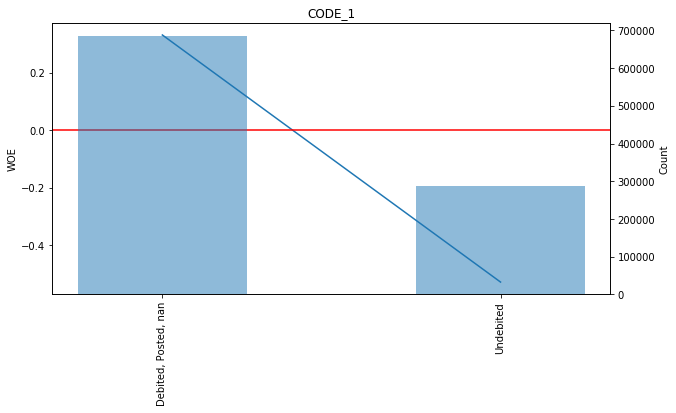

***

### CODE_2

,CNT_TOTAL,CNT_DEF,DEF_RATE,WOE,DIST_BAD,DIST_GOOD,WOE_check,IV,SHARE
BIN_CODE_2,,,,,,,,,
"Debited, Posted",670206.0,16569.0,0.0247,0.3093,0.5042,0.6942,0.3197,0.0607,0.6878
Undebited,261364.0,14959.0,0.0572,-0.5417,0.4552,0.2617,-0.5536,0.1071,0.2682
nan,42901.0,1333.0,0.0311,0.0821,0.0406,0.0441,0.0846,0.0003,0.0440


IV: 0.1682
Gini: 19.94


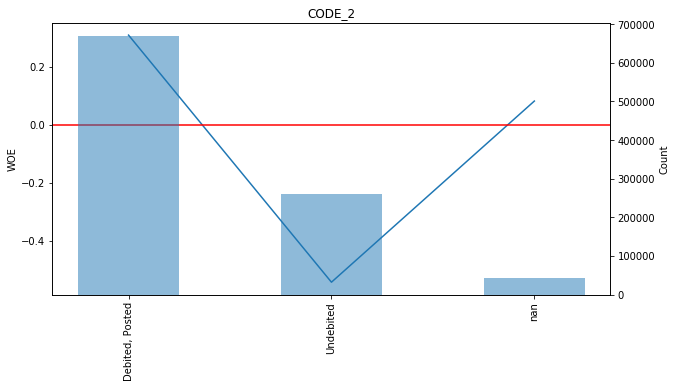

***

### CODE_3

,CNT_TOTAL,CNT_DEF,DEF_RATE,WOE,DIST_BAD,DIST_GOOD,WOE_check,IV,SHARE
BIN_CODE_3,,,,,,,,,
"Debited, Posted",656945.0,16341.0,0.0249,0.3032,0.4973,0.6803,0.3134,0.0574,0.6742
Undebited,238930.0,13793.0,0.0577,-0.5507,0.4197,0.2391,-0.5628,0.1017,0.2452
nan,78596.0,2727.0,0.0347,-0.0287,0.0830,0.0806,-0.0295,0.0001,0.0807


IV: 0.1591
Gini: 19.70


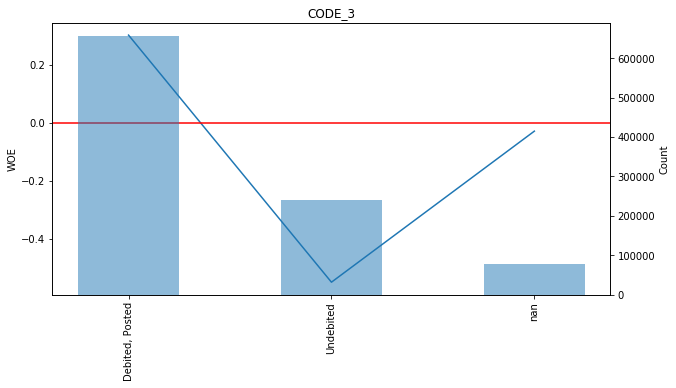

***

### CODE_4

,CNT_TOTAL,CNT_DEF,DEF_RATE,WOE,DIST_BAD,DIST_GOOD,WOE_check,IV,SHARE
BIN_CODE_4,,,,,,,,,
"Debited, Posted",635627.0,15721.0,0.0247,0.3088,0.4784,0.6583,0.3193,0.0574,0.6523
Undebited,210345.0,12001.0,0.0571,-0.5384,0.3652,0.2106,-0.5503,0.0851,0.2159
nan,128499.0,5139.0,0.0400,-0.1725,0.1564,0.1310,-0.1771,0.0045,0.1319


IV: 0.1470
Gini: 19.48


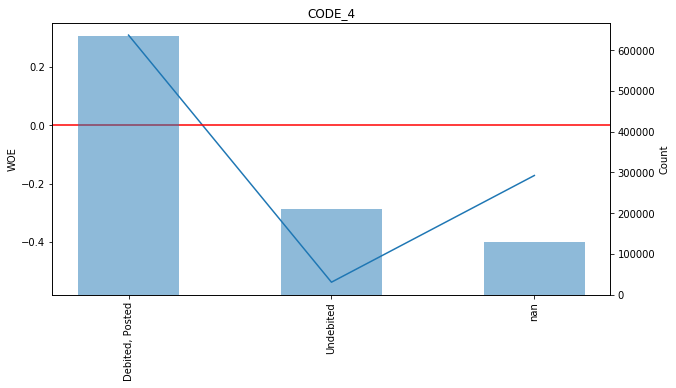

***

### CODE_5

,CNT_TOTAL,CNT_DEF,DEF_RATE,WOE,DIST_BAD,DIST_GOOD,WOE_check,IV,SHARE
BIN_CODE_5,,,,,,,,,
"Debited, Posted",605032.0,15016.0,0.0248,0.3054,0.4570,0.6266,0.3157,0.0536,0.6209
Undebited,180695.0,10141.0,0.0561,-0.5213,0.3086,0.1811,-0.5328,0.0679,0.1854
nan,188744.0,7704.0,0.0408,-0.1933,0.2344,0.1923,-0.1983,0.0084,0.1937


IV: 0.1298
Gini: 18.65


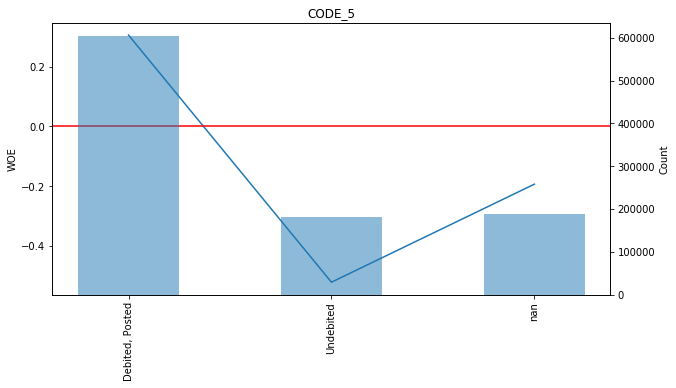

***

### CODE_6

,CNT_TOTAL,CNT_DEF,DEF_RATE,WOE,DIST_BAD,DIST_GOOD,WOE_check,IV,SHARE
BIN_CODE_6,,,,,,,,,
"Debited, Posted",548334.0,13734.0,0.0250,0.2964,0.4179,0.5678,0.3063,0.0459,0.5627
Undebited,146356.0,8183.0,0.0559,-0.5173,0.2490,0.1467,-0.5289,0.0541,0.1502
nan,279781.0,10944.0,0.0391,-0.1500,0.3330,0.2855,-0.1540,0.0073,0.2871


IV: 0.1073
Gini: 17.20


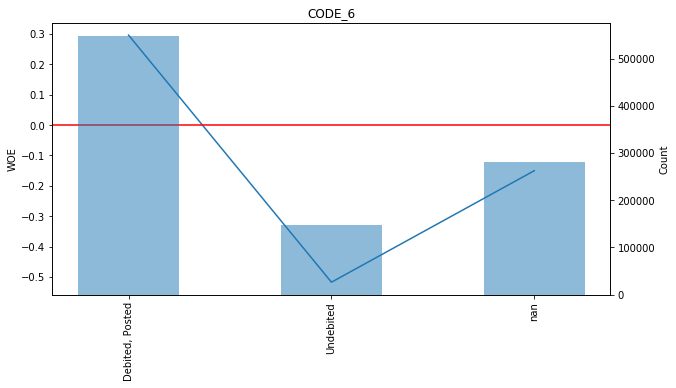

***

### REASON_1

CNT_TOTAL  CNT_DEF  \
BIN_REASON_1                                                             
 , ", "ACCOUNT STOPPED, 0, 03533249021082019, 0...   694807.0  16864.0   
03538923121082019, 03549849721082019, 1, 4, 5, ...   219941.0  12973.0   
101, Account Closed or Transferred, CLEARED BAL...    59723.0   3024.0   

                                                    DEF_RATE     WOE  \
BIN_REASON_1                                                           
 , ", "ACCOUNT STOPPED, 0, 03533249021082019, 0...    0.0243  0.3274   
03538923121082019, 03549849721082019, 1, 4, 5, ...    0.0590 -0.5732   
101, Account Closed or Transferred, CLEARED BAL...    0.0506 -0.4144   

                                                    DIST_BAD  DIST_GOOD  \
BIN_REASON_1                                                              
 , ", "ACCOUNT STOPPED, 0, 03533249021082019, 0...    0.5132     0.7200   
03538923121082019, 03549849721082019, 1, 4, 5, ...    0.3948     0.2198   
101, Account Closed or Transferred, CLEARED BAL...    0.0920     0.0602   

                                                    WOE_check      IV   SHARE  
BIN_REASON_1                                                                   
 , ", "ACCOUNT STOPPED, 0, 03533249021082019, 0...     0.3386  0.0700  0.7130  
03538923121082019, 03549849721082019, 1, 4, 5, ...    -0.5856  0.1025  0.2257  
101, Account Closed or Transferred, CLEARED BAL...    -0.4241  0.0135  0.0613

IV: 0.1860
Gini: 21.03


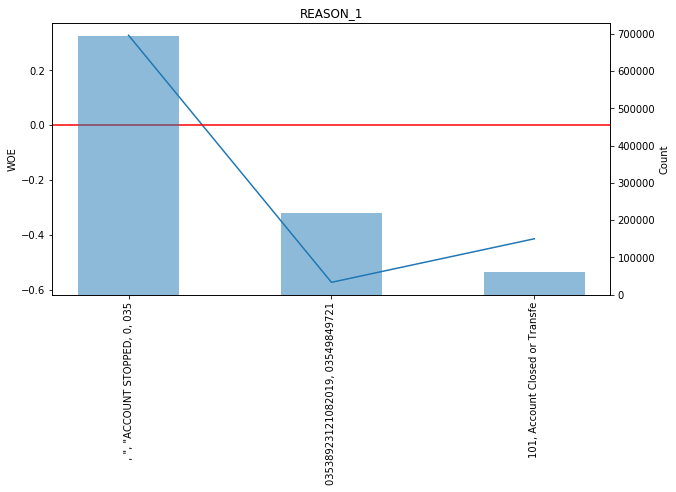

***

### REASON_2

,CNT_TOTAL,CNT_DEF,DEF_RATE,WOE,DIST_BAD,DIST_GOOD,WOE_check,IV,SHARE
BIN_REASON_2,,,,,,,,,
", ""ACCOUNT STOPPED, 0, 03534628421082019, 03534643321082019, 03534812221082019, 03535144621082019, 03536453521082019, 03539227221082019, 03539241021082019, 03539492421082019, 03541739221082019, 03541861021082019, 03541884121082019, 03541900821082019, 03542061321082019, 03542495821082019, 03542942221082019, 03546228621082019, 03546476021082019, 03546643321082019, 03546671421082019, 03546773421082019, 03548601021082019, 03549019421082019, 03549062621082019, 03549232921082019, 03549482521082019, 03549596921082019, 03550448021082019, 03550817921082019, 03551882421082019, 03553223221082019, 03553286421082019, 03554052821082019, 03554055621082019, 03554139921082019, 03554179921082019, 03554212821082019, 03554323321082019, 03556429321082019, 03556916021082019, 03556947521082019, 03557070521082019, 03557176021082019, 03557246021082019, 03557375521082019, 03557773421082019, 03558813321082019, 03559195721082019, 03560679021082019, 03560999621082019, 03561263521082019, 03562067221082019, 03563889821082019, 03564461321082019, 03564909421082019, 03565314421082019, 03566432421082019, 03567987721082019, 03568399321082019, 03568411121082019, 03568568921082019, 03568582521082019, 03568622821082019, 03569721021082019, 03571583521082019, 03571717921082019, 03571763321082019, 03571969821082019, 03573226321082019, 03573505921082019, 03573593321082019, 03575507321082019, 03576743221082019, 03594489821082019, 03602212121082019, 03604177221082019, 03774077521082019, 2, 5, 9, 999, ACCOUNT NUMBER DOES NOT MATCH WITH MANADTE DATA, ACCT HAS HOLD INSUFFICIENT FREE BAL FOR TXN, AMOUNT MUST NOT BE GREATER THAN MANDATE RECORD AMOUNT, Amount exceeds mandate max a, CLEARED BAL/FUNDS/DP NOT AVAILABLE, CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , Customer Name Mismatch, Customer to refer to the branc, DP NOT AVAILABLE ACCT CANNOT BE OVERDRAWN, EXCESS DRAWING NOT ALLOWED IN STAFF ACCOUNTS, Invalid Bank Identifier - Rece, Invalid UMRN or inactive manda, MANDATE RECORD IS REGISTERED MORE THAN ONCE, MANDATE REJECT: Mandate Not Received, MANDATE REJECT: Record Error, MANDATE REJECT: Signature Differs, MAX AGGR DEBIT AMT IN MNTH EXCEEDED, Mandate Cancelled, Mandate Not Received/UMRN Do, Mandate Not Received/UMRN Does, Miscellaneous-A/c Inactive(No , Miscellaneous-A/c Inactive(No transaction for last three months, Miscellaneous-A/c in Zero Ba, Miscellaneous-Account reached , Miscellaneous-Account reached maximum debit limit set on account by bank for debit per transaction, Miscellaneous-Amount exceeds, Miscellaneous-Amount exceeds l, Miscellaneous-Documentation , Miscellaneous-Dormant A/c(No, Miscellaneous-Dormant A/c(No t, Miscellaneous-KYC Document P, Miscellaneous-Network Failur, Miscellaneous-Network Failure(, Miscellaneous-Network Failure(CBS), Mismatch in Mandate Debtor A, Mismatch in Mandate Debtor Acc, Mismatch in mandate debtor b, NEW ACCOUNT OR MANUALLY RESTRICTED, NEW ACCOUNT OR MANUALLY RESTRICTEDKYC UPDATION, No Such Account, PERIDICITY FOR MANDATE RECORD IS OVER, PL ENQ - ACCT HAS MULTIPLE STOPS, PLEASE PROVIDE AADHAAR AT CIF LEVEL, Participant not mapped to the , Payment Stopped Under Court Or, Settlement Date before manda, Settlement Date before mandate, THE ACCOUNT HAS ACTIVE FULL FREEZE, TOO MANY NIGHT TRANSACTION's ARE PENDING FOR REPOSTING, XNA, nan",718026.0,18040.0,0.0251,0.2933,0.5490,0.7434,0.3032,0.0589,0.7368
"03535240221082019, 03546812921082019, 1, 101, 3, 4, 8, ACCOUNT CLOSE

IV: 0.1703
Gini: 19.76


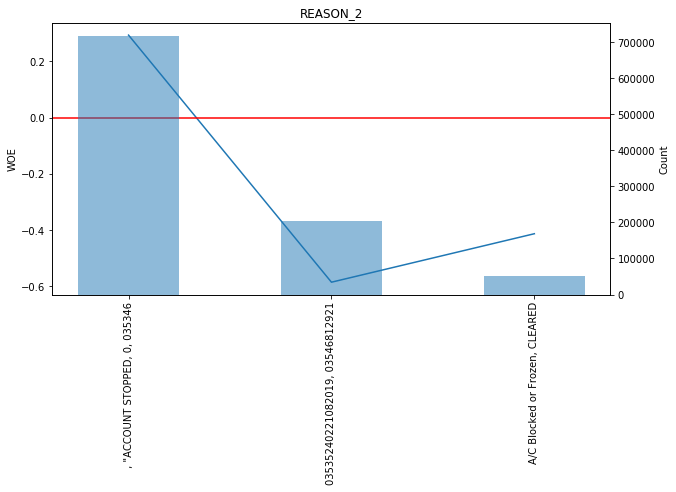

***

### REASON_3

,CNT_TOTAL,CNT_DEF,DEF_RATE,WOE,DIST_BAD,DIST_GOOD,WOE_check,IV,SHARE
BIN_REASON_3,,,,,,,,,
", "", 0, 03535065321082019, 03536129021082019, 03538597821082019, 03538656621082019, 03538976321082019, 03539357421082019, 03542120921082019, 03542377721082019, 03544471421082019, 03544523321082019, 03545927321082019, 03546103521082019, 03546327721082019, 03546331521082019, 03546393221082019, 03546588121082019, 03548357521082019, 03549221321082019, 03549470521082019, 03549522821082019, 03549675821082019, 03549993821082019, 03550073021082019, 03550570521082019, 03551432021082019, 03551801021082019, 03553818421082019, 03553869521082019, 03553936221082019, 03553976421082019, 03554094121082019, 03555283021082019, 03556413321082019, 03556436821082019, 03556450921082019, 03556622021082019, 03556805321082019, 03557001521082019, 03557016821082019, 03557052021082019, 03557110521082019, 03557342421082019, 03557411521082019, 03560768121082019, 03560909821082019, 03561316721082019, 03562547121082019, 03562767121082019, 03562945721082019, 03563064221082019, 03564305021082019, 03564886821082019, 03568412321082019, 03568508821082019, 03568826521082019, 03571166621082019, 03571187821082019, 03573043521082019, 03575441721082019, 03575784321082019, 3, 8, ABOVE MAX BALANCE, ACCOUNT NUMBER DOES NOT MATCH WITH MANADTE DATA, ACCT HAS HOLD INSUFFICIENT FREE BAL FOR TXN, AMOUNT MUST NOT BE GREATER THAN MANDATE RECORD AMOUNT, Amount exceeds mandate max a, CIF not scrutinized by LCPC, CLEARED BAL/FUNDS/DP NOT AVAILABLE, CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLECARE! ACCT WILL BE OVERDRAWN , DP NOT AVAILABLE ACCT CANNOT BE OVERDRAWN, EXCESS DRAWING NOT ALLOWED IN STAFF ACCOUNTS, Invalid Bank Identifier - Rece, MANDATE REJECT: Mandate Not Received, Mandate Cancelled, Mandate Not Received/UMRN Does, Miscellaneous-A/c Inactive(No transaction for last three months, Miscellaneous-Account reached , Miscellaneous-Account reached maximum debit limit set on account by bank for debit per transaction, Miscellaneous-Amount exceeds, Miscellaneous-Amount exceeds l, Miscellaneous-Documentation , Miscellaneous-Documentation pe, Miscellaneous-Documentation pending for account holder turning major, Miscellaneous-Network Failure(CBS), Miscellaneous-Simple Account, , Mismatch in Mandate Debtor A, Mismatch in Mandate Debtor Acc, Mismatch in mandate debtor b, Mismatch in mandate debtor ban, NEW ACCOUNT OR MANUALLY RESTRICTED, NEW ACCOUNT OR MANUALLY RESTRICTEDKYC UPDATION, PERIDICITY FOR MANDATE RECORD IS OVER, PL ENQ - ACCT HAS MULTIPLE STOPS, PLS SUBMIT KYC AND CHANGE ACCT PROD TO SB TINY SPECIAL, Payment Stopped Under Court , Payment Stopped Under Court Or, Settlement Date before mandate, THE ACCOUNT HAS ACTIVE PARTIAL FREEZE, TOO MANY NIGHT TRANSACTION's ARE PENDING FOR REPOSTING, XNA",658682.0,16386.0,0.0249,0.3031,0.4986,0.6821,0.3133,0.0575,0.6759
"""ACCOUNT STOPPED, 03549654421082019, 03550921821082019, 101, 2, 4, 5, A/C Blocked or Frozen, ACCOUNT CLOSED, ACCOUNT STOPPED, ACCOUNT UNAVAILABLE, ACCT HAS HOLD. INSUFFICIENT FREE BAL FOR TXN, Account Closed or Transferred, Balance Insufficient, CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE ACCT WILL BE OVERDRAWN, CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE ACCT WILL BE OVERDRAWN 000000, CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN, CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL

IV: 0.1612
Gini: 19.81


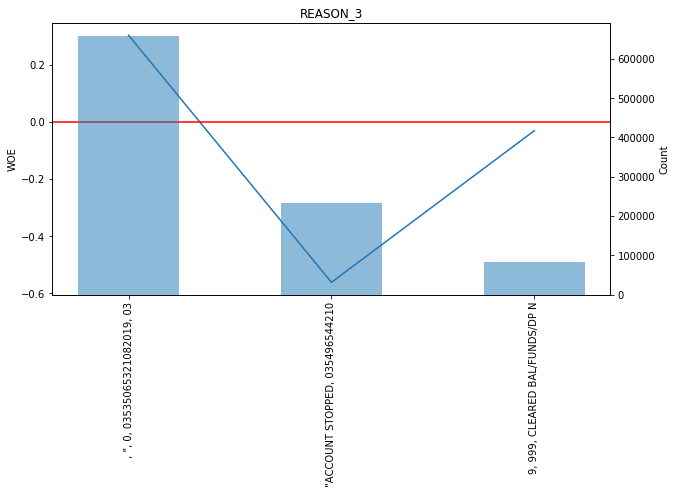

***

### REASON_4

,CNT_TOTAL,CNT_DEF,DEF_RATE,WOE,DIST_BAD,DIST_GOOD,WOE_check,IV,SHARE
BIN_REASON_4,,,,,,,,,
", 03546823721082019, 03547781721082019, 4, 5, 999, ACCOUNT CLOSED, ACCOUNT UNAVAILABLE, ACCT HAS HOLD. INSUFFICIENT FREE BAL FOR TXN, Balance Insufficient, CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE ACCT WILL BE OVERDRAWN, CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN, CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN 000000, CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN 000000, Customer to refer to the branch, DP NOT AVAILABLE ACCT CANNOT BE OVERDRAWN, DP NOT AVAILABLE. ACCT CANNOT BE OVERDRAWN, Date after Mandate End Date, Invalid Bank Identifier - Rece, MANDATE RECORD IS NOT AUTHORISED, MANDATE REJECT: No Signature in CBS, Mandate Amount Mismatch, Mandate Not Received/UMRN Does, Miscellaneous-A/c Inactive(N, Miscellaneous-Account reached , Miscellaneous-Documentation pe, NON-Home debit txn on Inoperative/Unclaimed a/c NOT allowed, No Such Account, PLS SUBMIT KYC AND CHANGE ACCT PROD TO SB TINY SPECIAL, Participant not mapped to th, SWEEP DETAILS NOT FOUND",204793.0,11817.0,0.0577,-0.5502,0.3596,0.2049,-0.5623,0.0870,0.2102
""", ""ACCOUNT STOPPED, 0, 03534454921082019, 03543152921082019, 2, 3, 8, A/C Blocked or Frozen, ABOVE MAX BALANCE, ACCOUNT NUMBER DOES NOT MATCH WITH MANADTE DATA, ACCT HAS HOLD INSUFFICIENT FREE BAL FOR TXN, AMOUNT MUST NOT BE GREATER THAN MANDATE RECORD AMOUNT, Account Closed or Transferred, Amount exceeds mandate max a, CIF not scrutinized by LCPC, CLEARED BAL/FUNDS/DP NOT AVAILABLE, CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLECARE! ACCT WILL BE OVERDRAWN , Customer Insolvent / Insane, Customer to refer to the branc, EXCESS DRAWING NOT ALLOWED IN STAFF ACCOUNTS, INSUFFICIENT FUNDS, Invalid Bank Identifier - Re, MANDATE RECORD DOES NOT EXISTS, MANDATE RECORD IS REGISTERED MORE THAN ONCE, MANDATE REJECT: Mandate Not Received, MANDATE REJECT: Signature Differs, MAX AGGR DEBIT AMT IN MNTH EXCEEDED, Mandate Cancelled, Miscellaneous-A/c Inactive(No , Miscellaneous-A/c Inactive(No transaction for last three months, Miscellaneous-A/c in Zero Bala, Miscellaneous-Account reached maximum debit limit set on account by bank for debit per transaction, Miscellaneous-Amount exceeds, Miscellaneous-Amount exceeds l, Miscellaneous-Documentation , Miscellaneous-Documentation pending for account holder turning major, Miscellaneous-Dormant A/c(No, Miscellaneous-Dormant A/c(No t, Miscellaneous-Dormant A/c(No transaction for last six months, Miscellaneous-Network Failur, Miscellaneous-Network Failure(, Miscellaneous-Network Failure(CBS), Mismatch in Mandate Debtor A, Mismatch in Mandate Debtor Acc, Mismatch in mandate debtor b, Mismatch in mandate debtor ban, NEW ACCOUNT OR MANUALLY RESTRICTED, NEW ACCOUNT OR MANUALLY RESTRICTEDkyc, NON-HOME DEBIT TXN ON INOPERATIVE/UNCLAIMED A/C NOT ALLOWED, NUMB

IV: 0.1494
Gini: 19.61


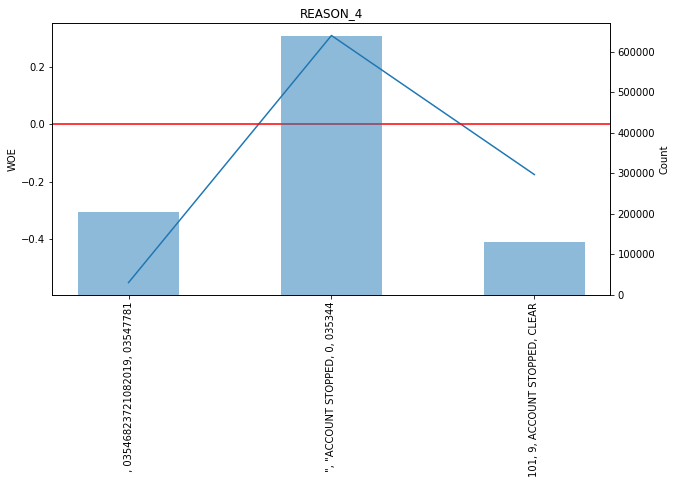

***

### REASON_5

,CNT_TOTAL,CNT_DEF,DEF_RATE,WOE,DIST_BAD,DIST_GOOD,WOE_check,IV,SHARE
BIN_REASON_5,,,,,,,,,
", "", ""ACCOUNT STOPPED, 0, 03539505821082019, 03542623621082019, 03546964821082019, 03564840821082019, 03612471921082019, 2, 3, 8, ABOVE MAX BALANCE, ACCOUNT NUMBER DOES NOT MATCH WITH MANADTE DATA, ACCOUNT STOPPED, AMOUNT MUST NOT BE GREATER THAN MANDATE RECORD AMOUNT, Account Closed or Transferred, Amount exceeds mandate max a, CIF not scrutinized by LCPC, CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE ACCT WILL BE OVERDRAWN 000000, CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , EXCESS DRAWING NOT ALLOWED IN STAFF ACCOUNTS, Invalid UMRN or inactive man, Invalid UMRN or inactive manda, MANDATE RECORD DOES NOT EXISTS, MANDATE RECORD IS NOT AUTHORISED, MANDATE RECORD IS REGISTERED MORE THAN ONCE, MANDATE REJECT: Mandate Not Received, MANDATE REJECT: Record Error, MANDATE REJECT: Signature Differs, MAX AGGR DEBIT AMT IN MNTH EXCEEDED, Mandate Cancelled, Miscellaneous-A/c Inactive(No , Miscellaneous-A/c Inactive(No transaction for last three months, Miscellaneous-A/c in Zero Ba, Miscellaneous-A/c in Zero Bala, Miscellaneous-Account reached , Miscellaneous-Account reached maximum debit limit set on account by bank for debit per transaction, Miscellaneous-Amount exceeds, Miscellaneous-Amount exceeds l, Miscellaneous-Documentation , Miscellaneous-Documentation pe, Miscellaneous-Network Failure(, Miscellaneous-Network Failure(CBS), Mismatch in Mandate Debtor A, Mismatch in Mandate Debtor Acc, Mismatch in mandate debtor b, Mismatch in mandate debtor ban, NEW ACCOUNT OR MANUALLY RESTRICTED, NEW ACCOUNT OR MANUALLY RESTRICTEDKYC UPDATION, NUMBER OF CASH WITHDRAWAL LIMITED EXCEEDED, No Such Account, Number of Cash withdrawal limited exceeded, PERIDICITY FOR MANDATE RECORD IS OVER, PL ENQ - ACCT HAS MULTIPLE STOPS, PLS SUBMIT KYC AND CHANGE ACCT PROD TO SB TINY SPECIAL, Payment Stopped Under Court , Payment Stopped by Drawer, Settlement Date before manda, Settlement Date before mandate, THE ACCOUNT HAS ACTIVE PARTIAL FREEZE, XNA",607787.0,15077.0,0.0248,0.3059,0.4588,0.6295,0.3162,0.0540,0.6237
"101, 9, CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE ACCT WILL BE OVERDRAWN, CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , Invalid Bank Identifier - Re, MANDATE REJECT: No Signature in CBS, Miscellaneous-Network Failur, nan",189746.0,7744.0,0.0408,-0.1932,0.2357,0.1933,-0.1982,0.0084,0.1947
"4, 5, 999, A/C Blocked or Frozen, ACCOUNT CLOSED, ACCOUNT UNAVAILABLE, ACCT HAS HOLD. INSUFFICIENT FREE BAL FOR TXN, Amount exceeds mandate max amo, Balance Insufficient, CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN, CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN 000000, CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN 000000, CLEARED BAL/FUNDS/DP NOT AVAILABLECARE! ACCT WILL BE OVERDRAWN , 

IV: 0.1322
Gini: 18.79


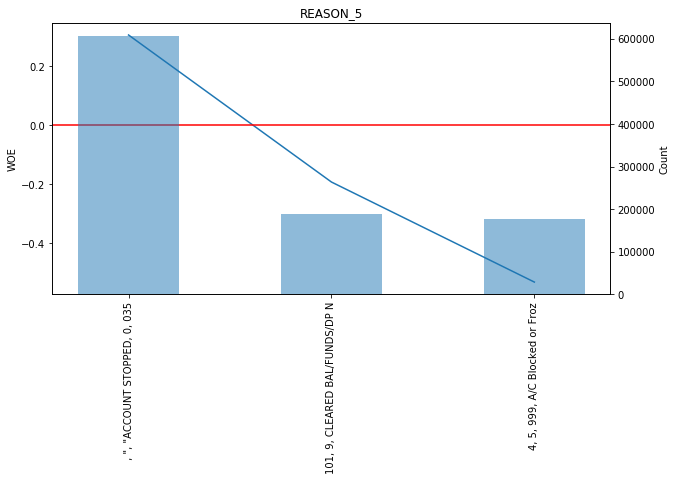

***

### REASON_6

,CNT_TOTAL,CNT_DEF,DEF_RATE,WOE,DIST_BAD,DIST_GOOD,WOE_check,IV,SHARE
BIN_REASON_6,,,,,,,,,
", 0, 03553642921082019, 03556433721082019, 101, 2, 3, 6, 8, 999, A/C Blocked or Frozen, ABOVE MAX BALANCE, ACCOUNT NUMBER DOES NOT MATCH WITH MANADTE DATA, ACCOUNT STOPPED, AMOUNT MUST NOT BE GREATER THAN MANDATE RECORD AMOUNT, Account Closed or Transferred, CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN 000000, CLEARED BAL/FUNDS/DP NOT AVAILABLECARE! ACCT WILL BE OVERDRAWN , Customer to refer to the branch, EXCESS DRAWING NOT ALLOWED IN STAFF ACCOUNTS, INSUFFICIENT FUNDS, Invalid Bank Identifier - Rece, Invalid UMRN or inactive man, Invalid UMRN or inactive manda, MANDATE RECORD DOES NOT EXISTS, MANDATE RECORD IS NOT AUTHORISED, MANDATE RECORD IS REGISTERED MORE THAN ONCE, MANDATE REJECT: Mandate Not Received, MANDATE REJECT: NO SIGNATURE IN CBS, MANDATE REJECT: Record Error, MANDATE REJECT: Signature Differs, MAX AGGR DEBIT AMT IN MNTH EXCEEDED, Mandate Not Received/UMRN Do, Mandate Not Received/UMRN Does, Miscellaneous-A/c Inactive(No , Miscellaneous-A/c Inactive(No transaction for last three months, Miscellaneous-Account reached , Miscellaneous-Account reached maximum debit limit set on account by bank for debit per transaction, Miscellaneous-Amount exceeds, Miscellaneous-Amount exceeds l, Miscellaneous-Documentation , Miscellaneous-Documentation pe, Miscellaneous-KYC Document P, Miscellaneous-Network Failure(CBS), Mismatch in Mandate Debtor A, Mismatch in Mandate Debtor Acc, Mismatch in mandate debtor b, Mismatch in mandate debtor ban, NEW ACCOUNT OR MANUALLY RESTRICTED, NEW ACCOUNT OR MANUALLY RESTRICTEDKYC UPDATION, NEW ACCOUNT OR MANUALLY RESTRICTEDkyc, PERIDICITY FOR MANDATE RECORD IS OVER, PL CONTACT SERVICE DESK, PL ENQ - ACCT HAS MULTIPLE STOPS, PLS SUBMIT KYC AND CHANGE ACCT PROD TO SB TINY SPECIAL, Participant not mapped to th, Payment Stopped Under Court , Payment Stopped Under Court Or, Payment Stopped by Drawer, Settlement Date before manda, Settlement Date before mandate, TOO MANY NIGHT TRANSACTION's ARE PENDING FOR REPOSTING, XNA",550651.0,13784.0,0.0250,0.2970,0.4195,0.5702,0.3069,0.0463,0.5651
""", 4, 5, ACCOUNT CLOSED, ACCT HAS HOLD. INSUFFICIENT FREE BAL FOR TXN, Amount exceeds mandate max a, Balance Insufficient, CIF not scrutinized by LCPC, CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE ACCT WILL BE OVERDRAWN, CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE ACCT WILL BE OVERDRAWN 000000, CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN, CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN , CLEARED BAL/FUNDS/DP NOT AVAILABLE.CARE! ACCT WILL BE OVERDRAWN 000000, Customer to refer to the br, Customer to refer to the branc, DP NOT AVAILABLE ACCT CANNOT BE OVERDRAWN, DP NOT AVAILABLE. ACCT CANNOT BE OVERDRAWN, Date after Mandate End Date, Invalid Bank Identifier - Re, Mandate Amount Mismatch, Miscellaneous-A/c Inactive(N, Miscellaneous-Dormant A/c(No, Miscellaneous-Dormant A/c(No t, NON-Home debit txn on Inoperative/Unclaimed a/c NOT allowed, No Such Account, PLEASE PROVIDE AADHAAR

IV: 0.1095
Gini: 17.34


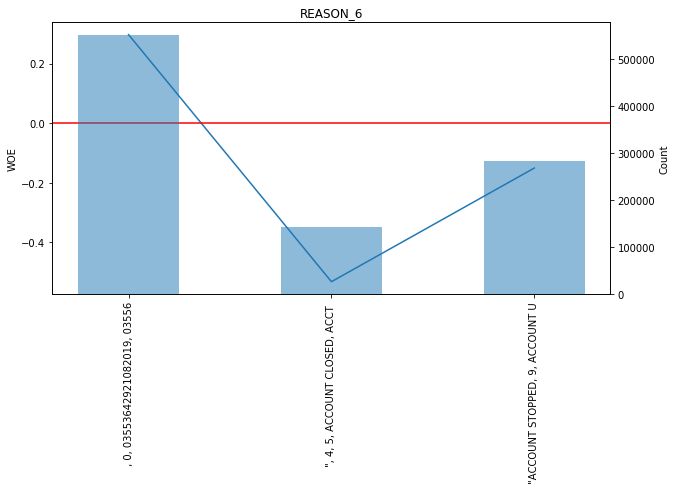

In [20]:
grouping.plot_bins(data=df_train, cols_pred_num=cols_pred_num, cols_pred_cat=cols_pred_cat,
                    mask = pd.Series(df_train["RISK_FSTQPD60"]>=0),col_target="RISK_FSTQPD60", 
                   output_folder=r"C:\Users\aman.khatri91425\Desktop\HomeCredit\Bigdata\Common Maps KNN", col_weight=None)

In [21]:
woe_columns_to_replace = list()
for column in data_woe.columns:
    if column in df:
        woe_columns_to_replace.append(column)
        print('Column', column ,'dropped as it already existed in the data set.')
df = df.drop(woe_columns_to_replace, axis='columns')
df = df.join(-data_woe)

print('Added WOE variables. Number of columns:',df.shape[1])
cols_woe = [s + '_WOE' for s in cols_pred_num]

Added WOE variables. Number of columns: 46


# Read Data File (Techprocess)

In [32]:
df1= pd.read_csv(os.getcwd()+"\Data Files\Book4.csv",encoding = "ISO-8859-1")

# WOE Analysis

In [33]:
df1.columns

Index(['SKP_CREDIT_CASE', 'SKP_CLIENT', 'SKP_CREDIT_TYPE', 'DATE_DECISION',
       'FOUNDIN', 'CODE', 'ERROR_CODE', 'MESSAGE', 'INSERT_CACHE',
       'DUMMY_RESULT', 'SUBHEADER_CLIENT_NAME', 'SUBHEADER_CODE',
       'ACT_ACC_HOLDER_NAME', 'ACT_ACC_NO', 'ACT_ACC_TYPE', 'ACT_ACC_STATUS',
       'ACT_ACC_STATUS_CODE', 'ACT_REQUEST_ID', 'ACT_FAILED_SUMMARY',
       'ACT_MICR', 'ACT_MRCT_CODE', 'ACT_SUCCESS_SUMMARY', 'ACT_TXN_DATE',
       'ACT_TXN_STATUS_CODE', 'ACT_TXN_STATUS_DESC', 'ACT_TXN_DATE_1',
       'ACT_TXN_STATUS_CODE_1', 'ACT_TXN_STATUS_DESC_1', 'ACT_TXN_DATE_2',
       'ACT_TXN_STATUS_CODE_2', 'ACT_TXN_STATUS_DESC_2', 'ACT_TXN_DATE_3',
       'ACT_TXN_STATUS_CODE_3', 'ACT_TXN_STATUS_DESC_3', 'RISK_AGRF180',
       'RISK_FSTQPD60', 'PRODUCT_GROUP', 'CLIENT_EXI_3M'],
      dtype='object')

In [64]:
df_train = df1

In [65]:
df_train["ACT_TXN_STATUS_DESC_2"].nunique()

146

In [66]:
cols_pred_num=[]
cols_pred_cat = ['ACT_TXN_STATUS_CODE_1', 'ACT_TXN_STATUS_DESC_1',
                 'ACT_TXN_STATUS_CODE_2', 'ACT_TXN_STATUS_DESC_2','ACT_TXN_STATUS_CODE_3', 'ACT_TXN_STATUS_DESC_3']

In [67]:
from scoring.grouping import Grouping

grouping = Grouping(columns = sorted(cols_pred_num),
                    cat_columns = sorted(cols_pred_cat),
                    group_count=3,
                    min_samples=1000,
                   min_samples_cat = 30)

grouping.fit(df_train[cols_pred_cat],
             df_train["RISK_FSTQPD60"],
          #   w=data[train_mask][col_weight],
            progress_bar=True, category_limit=200)

grouping.save(r"C:\Users\aman.khatri91425\Desktop\HomeCredit\Bigdata\Techprocess Alternate\my_grouping1")

data_woe = grouping.transform(df1, transform_to='woe', progress_bar=True)

'Grouping saved on 2020-06-16 09:26:19 to file C:\\Users\\aman.khatri91425\\Desktop\\HomeCredit\\Bigdata\\Techprocess Alternate\\my_grouping1'

### Plot Bins

***

### ACT_TXN_STATUS_CODE_1

,CNT_TOTAL,CNT_DEF,DEF_RATE,WOE,DIST_BAD,DIST_GOOD,WOE_check,IV,SHARE
BIN_ACT_TXN_STATUS_CODE_1,,,,,,,,,
"D, E",24188.0,1374.0,0.0568,-0.6035,0.2434,0.1313,-0.6173,0.0692,0.1348
"S, I",155230.0,4271.0,0.0275,0.1338,0.7566,0.8687,0.1382,0.0155,0.8652


IV: 0.0847
Gini: 11.21


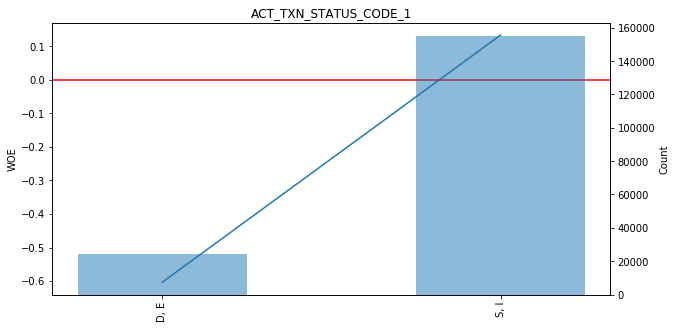

***

### ACT_TXN_STATUS_CODE_2

,CNT_TOTAL,CNT_DEF,DEF_RATE,WOE,DIST_BAD,DIST_GOOD,WOE_check,IV,SHARE
BIN_ACT_TXN_STATUS_CODE_2,,,,,,,,,
"D, S, I",141106.0,3735.0,0.0265,0.1722,0.6616,0.7905,0.1780,0.0229,0.7865
E,23247.0,1307.0,0.0562,-0.5927,0.2315,0.1263,-0.6064,0.0638,0.1296
nan,15065.0,603.0,0.0400,-0.2430,0.1068,0.0832,-0.2496,0.0059,0.0840


IV: 0.0927
Gini: 13.47


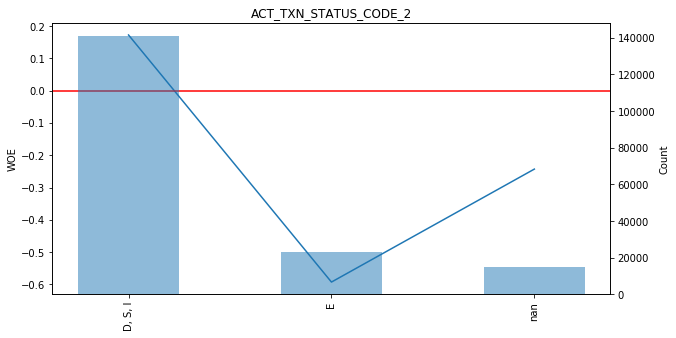

***

### ACT_TXN_STATUS_CODE_3

,CNT_TOTAL,CNT_DEF,DEF_RATE,WOE,DIST_BAD,DIST_GOOD,WOE_check,IV,SHARE
BIN_ACT_TXN_STATUS_CODE_3,,,,,,,,,
"D, nan",33066.0,1230.0,0.0372,-0.1686,0.2179,0.1832,-0.1734,0.0060,0.1843
E,18930.0,1065.0,0.0563,-0.5934,0.1887,0.1028,-0.6071,0.0521,0.1055
S,127422.0,3350.0,0.0263,0.1789,0.5934,0.7140,0.1849,0.0223,0.7102


IV: 0.0804
Gini: 13.27


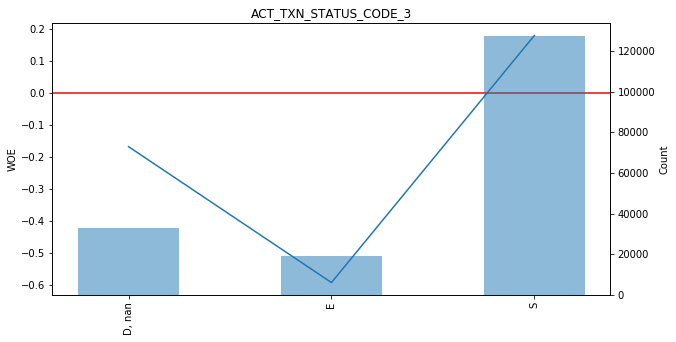

***

### ACT_TXN_STATUS_DESC_1

,CNT_TOTAL,CNT_DEF,DEF_RATE,WOE,DIST_BAD,DIST_GOOD,WOE_check,IV,SHARE
BIN_ACT_TXN_STATUS_DESC_1,,,,,,,,,
"0 - Other, 00 - Success, 02 - Non-Existent A/C, 03 - Wrong A/c Name, 06 - Stop Pymt by Drawer, 08 - ECS Mandate not Recvd, 09 - Other, 13 - Wrong A/c Name, 14 - Insufficient Funds, 18 - ECS Mandate not Recvd, 19 - Miscelleneous, 61 - Other, 70 - Other, DE01169 - Other, DE01432 - Other, FUNDSINSUFFICIENT - Other, Funds insufficient - Other, Insuficient balance - Other, MANDATE EXPIRED - Other, PROCESSED SUCCESSFULLY - Other, Successful - Other",164388.0,4627.0,0.0281,0.1112,0.8197,0.9194,0.1148,0.0114,0.9162
"01 - Closed A/c, 12 - Non-Existent A/C, 4 - Insufficient Funds, FUNDS INSUFFICIENT - Other, Insufficient Funds - Other, Insufficient balance - Other, Insufficient funds. - Other, No Funds Available - Other, funds insufficent - Other",2208.0,193.0,0.0874,-1.0613,0.0342,0.0116,-1.0813,0.0244,0.0123
"04 - Insufficient Funds, 05 - Not Arranged/Exceeds Arrangement, DE0542 - Other, DE0570 - Other, Funds Insufficient - Other, INSUFFICIENT BALANCE - Other, INSUFFICIENT FUND - Other, INSUFFICIENT FUNDS - Other, Insufficient Balance - Other, Insufficient funds - Other, insufficient fund - Other, / FUNDS INSUFFICIENT - Other, 01FUNDS INSUFFICIENT - Other, 11 - Closed A/c, 15 - Not Arranged/Exceeds Arrangement, 16 - Stop Pymt by Drawer, 17 - Pymt Stopped under Court Order, 44 - Other, 53 - Other, 54 - Other, 55 - Other, 57 - Other, 58 - Other, 59 - Other, 68 - Other, 8 - ECS Mandate not Recvd, A C DORMANT - Other, A C FROZEN - Other, ACCOUNT BLOCKED SITUATION - Other, ACCOUNT CLOSED - Other, ACCOUNT STOPPED - Other, Account Is No Dr Allowed - Other, Account has been closed - Other, Amount in mandate differ - Other, Chronic_Deleted - Other, DE01003 - Other, DE01062 - Other, DE01063 - Other, DE01073 - Other, DE01085 - Other, DE01091 - Other, DE01098 - Other, DE01256 - Other, DE0543 - Other, DE0550 - Other, DE0553 - Other, DE0556 - Other, DE0557 - Other, DE0558 - Other, DE0563 - Other, DE0603 - Other, DE0606 - Other, DE0776 - Other, DE0793 - Other, DE0999 - Other, DEBIT FROZEN ACCOUNT - Other, DORMANT INACTIVE - Other, Dormant AC - Other, ECS mandate not received - Other, END DATE OVER - Other, END date over - Other, FUND INSUFFICIENT - Other, FUNDS INSUFFICEINT - Other, FUNDS INSUFFICENT - Other, FUNDS INSUUFICIENT - Other, FUNDS Infufficient - Other, Fund Insufficient - Other, Fund insufficient - Other, Fundns Insufficients - Other, Funds Insufficiebt - Other, INSUFFICENT FUND - Other, INSUFFICENT FUNDS - Other, INSUFFICIEN T FUND - Other, INSUFFICIENT BAL - Other, INSUFFIVCIENT FUND - Other, INSUFICIENT FUND - Other, INSUFICVIENT FUND - Other, Insufficient Fund - Other, Insufficient fund - Other, InsufficientBalance - Other, Insuficienmt balance - Other, Insuficient balannce - Other, Insuficinet balance - Other, Invalid Account Number - Other, MISC RECORD NOT EXIST - Other, Mand exp for User - Other, Mandate is not Registered - Other, Miscellaneous - Other, NOT SUFFICIENT FUND - Other, No mandate - Other, Return Insufficient funds - Other, SI end date over - Other, STOP PAYMENT - Other, Sanction limit expired - Other, Si end date over - Other, Stop Payment - Other, TRANSACTION NOT PERMITTED - Other, account FROZEN - Other, end date over - Other, fund insufficient - Other, funds insufficient - Other, insuffcient fund - Other, insufficent fund - Other, insufficient fumd - Other, insufficient funds - Other, nsufficient funds - Other",12822.0,825.0,0.0643,-0.7340,0.1461,0.0690,-0.7500,0.0578,0.0715


IV: 0.0937
Gini: 10.04


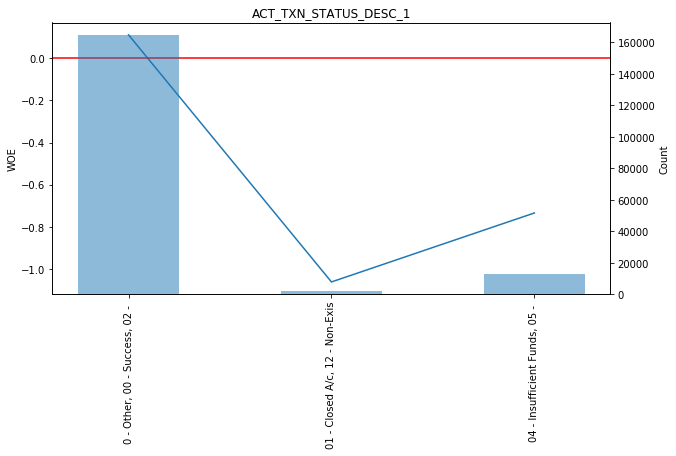

***

### ACT_TXN_STATUS_DESC_2

,CNT_TOTAL,CNT_DEF,DEF_RATE,WOE,DIST_BAD,DIST_GOOD,WOE_check,IV,SHARE
BIN_ACT_TXN_STATUS_DESC_2,,,,,,,,,
"0 - Other, 00 - Success, 08 - ECS Mandate not Recvd, 13 - Wrong A/c Name, 18 - ECS Mandate not Recvd, 61 - Other, DE01169 - Other, DE0542 - Other, DE0543 - Other, FUNDSINSUFFICIENT - Other, Fund insufficient - Other, Successful - Other",143109.0,3784.0,0.0264,0.1732,0.6703,0.8018,0.1790,0.0235,0.7976
"04 - Insufficient Funds, 05 - Not Arranged/Exceeds Arrangement, 19 - Miscelleneous, 4 - Insufficient Funds, FUNDS INSUFFICIENT - Other, Funds insufficient - Other, INSUFFICIENT BALANCE - Other, INSUFFICIENT FUND - Other, INSUFFICIENT FUNDS - Other, Insufficient Balance - Other, Insufficient Fund - Other, Insufficient Funds - Other, Insufficient balance - Other, Insufficient funds - Other, Insufficient funds. - Other, Insuficient balance - Other, Return Insufficient funds - Other, funds insufficent - Other, insufficient fund - Other, / FUNDS INSUFFICIENT - Other, 01 - Closed A/c, 02 - Non-Existent A/C, 03 - Wrong A/c Name, 06 - Stop Pymt by Drawer, 11 - Closed A/c, 12 - Non-Existent A/C, 15 - Not Arranged/Exceeds Arrangement, 16 - Stop Pymt by Drawer, 17 - Pymt Stopped under Court Order, 44 - Other, 53 - Other, 54 - Other, 57 - Other, 58 - Other, 59 - Other, 68 - Other, 70 - Other, 8 - ECS Mandate not Recvd, A C DORMANT - Other, A C FROZEN - Other, A/C FROZEN - Other, ACCOUNT BLOCKED SITUATION - Other, Account Closed - Other, Account Is No Dr Allowed - Other, Chronic_Deleted - Other, DE01003 - Other, DE01006 - Other, DE01062 - Other, DE01073 - Other, DE01080 - Other, DE01082 - Other, DE01085 - Other, DE01156 - Other, DE01161 - Other, DE01256 - Other, DE01296 - Other, DE01432 - Other, DE01450 - Other, DE0548 - Other, DE0550 - Other, DE0557 - Other, DE0558 - Other, DE0563 - Other, DE0606 - Other, DE0770 - Other, DE0776 - Other, DE0790 - Other, DE0816 - Other, DE0999 - Other, DEBIT FREEZE - Other, DEBIT FROZEN ACCOUNT - Other, DORMANT A C - Other, DORMANT INACTIVE - Other, Debit Account Frozen - Other, Dormant AC - Other, ECS mandate not received - Other, END DATE OVER - Other, END date over - Other, FUND INSUFFICIENT - Other, FUNDS INDUFFICIENT - Other, FUNDS INSUFFCIENT - Other, FUNDS INSUFFICEINT - Other, FUNDS INSUFFICENT - Other, FUNDS INSUFFICIE - Other, Fund Insufficient - Other, Fund Insuficient - Other, Fund insuffcient - Other, Funds insuffcient - Other, INSUF BAL - Other, INSUFFICIEN T FUND - Other, INSUFFICIENT BAL - Other, INSUFFICIENT Funds - Other, INSUFFICVIENT FUND - Other, INSUFFIVCIENT FUND - Other, INSUFICVIENT FUND - Other, Iinsufficient funds - Other, Insufficent balance - Other, Insufficient fund - Other, InsufficientBalance - Other, Insuficent balance - Other, Insuficient amount - Other, Insuficient balannce - Other, Insuficinet balance - Other, Invalid Account Number - Other, MANDATE EXPIRED - Other, MANDATE NOT AVAILABLE - Other, Mandate is not Registered - Other, No mandate - Other, REFER TO BRANCH - Other, SI end date over - Other, STOP PAYMENT - Other, Stop Payment - Other, TRANSACTION NOT PERMITTED - Other, Total Freeze - Other, UNSUFFICIENT FUND - Other, dormant a c - Other, end date over - Other, fund insufficent - Other, fund insufficient - Other, funds insufficient - Other, funds insusufficient - Other, insuffcient fund - Other, insufficent fund - Other, insufficient Fund - Other, insufficient balance - Other, insufficient funds - Other, insuficent balance - Other, nsufficient funds - Other",16092.0,1045.0,0.0649,-0.7438,0.1851,0.0866,-0.7598,0.0749,0.0897
"09 - Other, 14 - Insufficient Funds, DE0570 - Other, Funds Insufficient - Other, No Funds Available - Other, PROCESSED SUCCESSFULLY - Other, nan",20217.0,816.0,0.0404,-0.2515,0.1446,0.1116,-0.2583,0.0085,0.1127


IV: 0.1069
Gini: 13.96


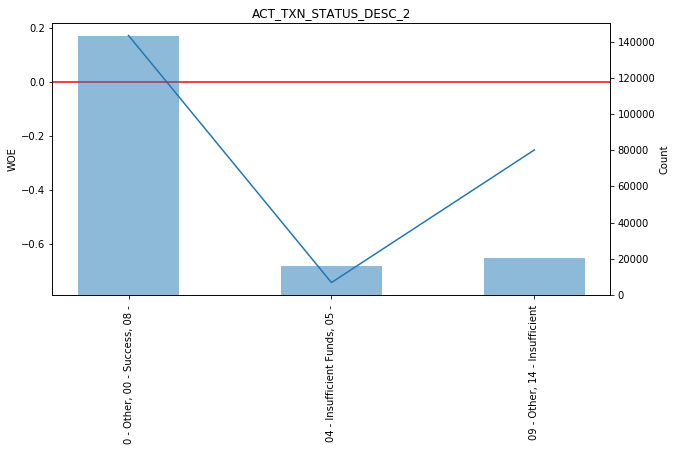

***

### ACT_TXN_STATUS_DESC_3

,CNT_TOTAL,CNT_DEF,DEF_RATE,WOE,DIST_BAD,DIST_GOOD,WOE_check,IV,SHARE
BIN_ACT_TXN_STATUS_DESC_3,,,,,,,,,
"0 - Other, 00 - Success, 18 - ECS Mandate not Recvd, Fund insufficient - Other, Funds Insufficient - Other, Insufficient Fund - Other, Successful - Other",127927.0,3359.0,0.0263,0.1801,0.5950,0.7168,0.1862,0.0227,0.7130
"04 - Insufficient Funds, 05 - Not Arranged/Exceeds Arrangement, 19 - Miscelleneous, 4 - Insufficient Funds, DE01062 - Other, DE0542 - Other, DE0543 - Other, DE0570 - Other, FUNDS INSUFFICIENT - Other, INSUFFICIENT BALANCE - Other, INSUFFICIENT FUND - Other, INSUFFICIENT FUNDS - Other, Insufficient Balance - Other, Insufficient Funds - Other, Insufficient balance - Other, Insufficient funds - Other, Insuficient balance - Other, No Funds Available - Other, funds insufficent - Other, insufficient fund - Other, / FUNDS INSUFFICIENT - Other, 01 - Closed A/c, 01FUNDS INSUFFICIENT - Other, 02 - Non-Existent A/C, 03 - Wrong A/c Name, 06 - Stop Pymt by Drawer, 11 - Closed A/c, 12 - Non-Existent A/C, 13 - Wrong A/c Name, 15 - Not Arranged/Exceeds Arrangement, 16 - Stop Pymt by Drawer, 17 - Pymt Stopped under Court Order, 44 - Other, 54 - Other, 57 - Other, 58 - Other, 59 - Other, 61 - Other, 68 - Other, 70 - Other, 8 - ECS Mandate not Recvd, A C DORMANT - Other, A C FROZEN - Other, A/C FROZEN - Other, ACCOUNT BLOCKED SITUATION - Other, ACCOUNT STOPPED - Other, Account Is No Dr Allowed - Other, Account frozen - Other, Chronic_Deleted - Other, DE01003 - Other, DE01006 - Other, DE01007 - Other, DE01073 - Other, DE01091 - Other, DE01093 - Other, DE01106 - Other, DE01117 - Other, DE01132 - Other, DE01141 - Other, DE01256 - Other, DE01432 - Other, DE0550 - Other, DE0556 - Other, DE0557 - Other, DE0558 - Other, DE0563 - Other, DE0606 - Other, DE0770 - Other, DE0776 - Other, DE0999 - Other, DORMANT A C - Other, DORMANT INACTIVE - Other, Dormant AC - Other, FUND INSUFFICIENT - Other, FUNDS INDUFFICIENT - Other, FUNDS INSUFFICIE - Other, FUNDS INSUFICIENT - Other, FUNDSINSUFFICIENT - Other, Fund Insufficient - Other, Fund insuffcient - Other, Funds insfufficient - Other, Funds insufficent - Other, Funds unsufficient - Other, INSUF BAL - Other, INSUFF. BAL - Other, INSUFFICENT FUNDS - Other, INSUFFICIEN T FUND - Other, INSUFFICIENT BAL - Other, INSUFFICIENT Funds - Other, INSUFFICIENTFUND - Other, INSUFFICVIENT FUND - Other, INSUFFIVCIENT FUND - Other, Insufficient fund - Other, InsufficientBalance - Other, Insuffieicnt Balance - Other, Insuficent balance - Other, Insuficinet balance - Other, Insuificient balance - Other, MANDATE EXPIRED - Other, MANDATE NOT AVAILABLE - Other, Mandate is not Registered - Other, Mandate not registered - Other, Return/Insufficient funds - Other, SI end date over - Other, START DATE NOT VALID - Other, STOP PAYMENT - Other, TRANSACTION NOT PERMITTED - Other, UNSUFFICIENT FUND - Other, a c closed - Other, a c dormant - Other, fund insufficient - Other, funds insufficient - Other, insuffcient fund - Other, insufficent fund - Other, insufficient Fund - Other, insufficient balance - Other, insufficient funds - Other, insufficint fund - Other, insuficient fund - Other, nsufficient funds - Other",13594.0,854.0,0.0628,-0.7089,0.1513,0.0733,-0.7244,0.0565,0.0758
"08 - ECS Mandate not Recvd, 09 - Other, 14 - Insufficient Funds, DE01169 - Other, Funds insufficient - Other, Insufficient funds. - Other, PROCESSED SUCCESSFULLY - Other, Return Insufficient funds - Other, nan",37897.0,1432.0,0.0378,-0.1845,0.2537,0.2098,-0.1897,0.0083,0.2112


IV: 0.0875
Gini: 13.50


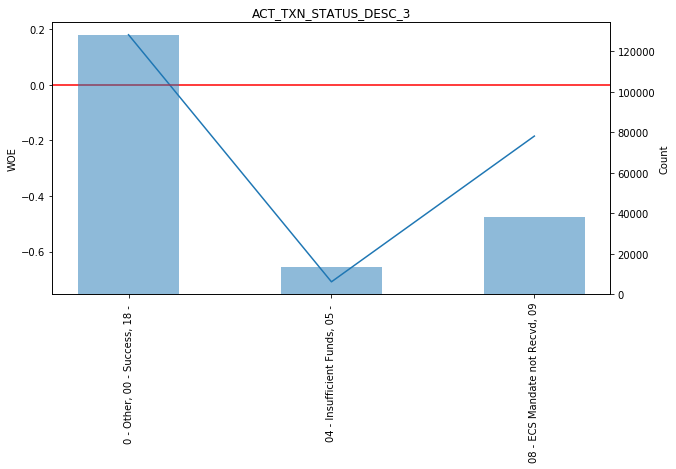

In [68]:
grouping.plot_bins(data=df_train, cols_pred_num=cols_pred_num, cols_pred_cat=cols_pred_cat,
                    mask = pd.Series(df_train["RISK_FSTQPD60"]>=0),col_target="RISK_FSTQPD60", 
                   output_folder=r"C:\Users\aman.khatri91425\Desktop\HomeCredit\Bigdata\Common Maps KNN", col_weight=None)

In [13]:
woe_columns_to_replace = list()
for column in data_woe.columns:
    if column in df:
        woe_columns_to_replace.append(column)
        print('Column', column ,'dropped as it already existed in the data set.')
df = df.drop(woe_columns_to_replace, axis='columns')
df = df.join(-data_woe)

print('Added WOE variables. Number of columns:',df.shape[1])
cols_woe = [s + '_WOE' for s in cols_pred_num]

Added WOE variables. Number of columns: 46
